# 可视化探索语义分割数据集

同济子豪兄 2023-1-31 6-11

## 进入`mmsegmentation`主目录

In [1]:
import os
os.chdir('mmsegmentation')

In [2]:
os.getcwd()

'/home/featurize/work/MMSegmentation教程20230625/0816录制视频/mmsegmentation'

## 导入工具包

In [3]:
import os

import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

## 查看单张图像及其语义分割标注

In [4]:
# 指定单张图像路径
img_path = 'Watermelon87_Semantic_Seg_Mask/img_dir/train/045_sozai_l.jpg'
mask_path = 'Watermelon87_Semantic_Seg_Mask/ann_dir/train/045_sozai_l.png'

In [5]:
# Image.open(img_path)

In [6]:
# Image.open(mask_path)

In [7]:
img = cv2.imread(img_path)
mask = cv2.imread(mask_path)

In [8]:
img.shape

(300, 440, 3)

In [9]:
mask.shape

(300, 440, 3)

## mask灰度图标注含义

In [10]:
# mask 语义分割标注，与原图大小相同
np.unique(mask)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

| 类别编号 | 类别名称   |
| -------- | ---------- |
| 0        | background       |
| 1        | red       |
| 2        | green   |
| 3        | white |
| 4        | seed-black      |
| 5        | seed-white  |

## 将语义分割标注叠加在原图上显示

In [11]:
# 每个类别的 BGR 配色
palette = [
    ['background', [127,127,127]],
    ['red', [0,0,200]],
    ['green', [0,200,0]],
    ['white', [144,238,144]],
    ['seed-black', [30,30,30]],
    ['seed-white', [8,189,251]]
]

In [12]:
palette_dict = {}
for idx, each in enumerate(palette):
    palette_dict[idx] = each[1]

In [13]:
palette_dict

{0: [127, 127, 127],
 1: [0, 0, 200],
 2: [0, 200, 0],
 3: [144, 238, 144],
 4: [30, 30, 30],
 5: [8, 189, 251]}

In [14]:
mask = mask[:,:,0]

# 将预测的整数ID，映射为对应类别的颜色
viz_mask_bgr = np.zeros((mask.shape[0], mask.shape[1], 3))
for idx in palette_dict.keys():
    viz_mask_bgr[np.where(mask==idx)] = palette_dict[idx]
viz_mask_bgr = viz_mask_bgr.astype('uint8')

# 将语义分割标注图和原图叠加显示
opacity = 0.2 # 透明度越大，可视化效果越接近原图
label_viz = cv2.addWeighted(img, opacity, viz_mask_bgr, 1-opacity, 0)

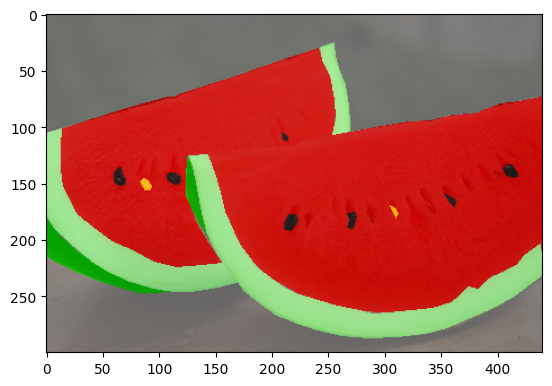

In [15]:
plt.imshow(label_viz[:,:,::-1])
plt.show()

In [16]:
cv2.imwrite('outputs/D-1.jpg', label_viz)

True

## 批量可视化图像和标注

In [25]:
# 指定图像和标注路径

# 训练集
PATH_IMAGE = 'Watermelon87_Semantic_Seg_Mask/img_dir/train'
PATH_MASKS = 'Watermelon87_Semantic_Seg_Mask/ann_dir/train'

# 测试集
# PATH_IMAGE = 'Watermelon87_Semantic_Seg_Mask/img_dir/val'
# PATH_MASKS = 'Watermelon87_Semantic_Seg_Mask/ann_dir/val'

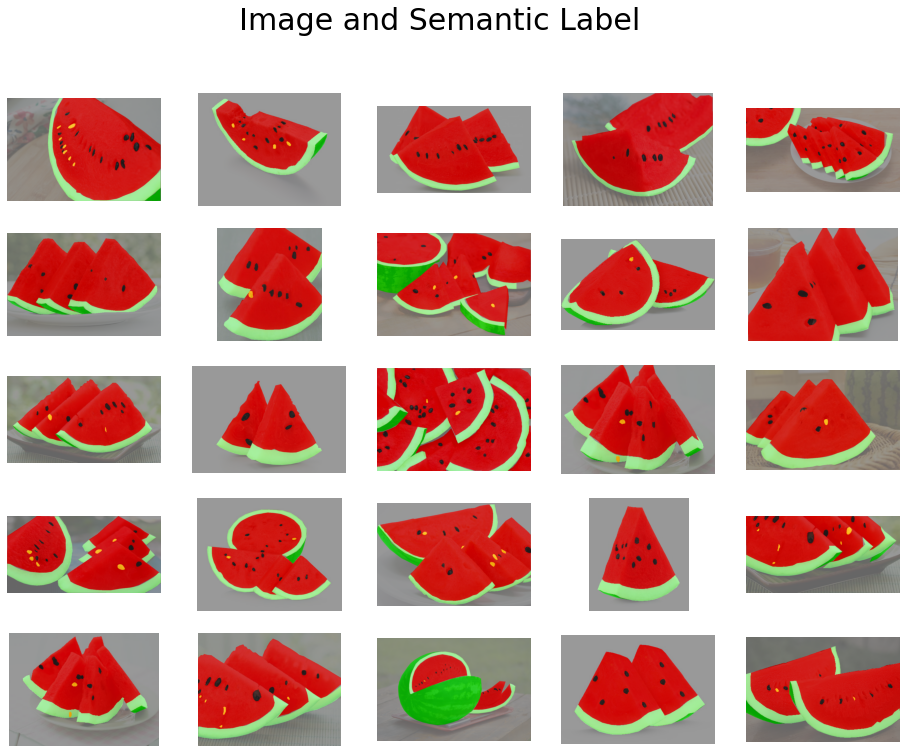

In [26]:
# n 行 n 列可视化
n = 5

# 透明度越大，可视化效果越接近原图
opacity = 0.2 

fig, axes = plt.subplots(nrows=n, ncols=n, figsize=(16, 12))

for i, file_name in enumerate(os.listdir(PATH_IMAGE)[:n**2]):
    
    # 载入图像和标注
    img_path = os.path.join(PATH_IMAGE, file_name)
    mask_path = os.path.join(PATH_MASKS, file_name.split('.')[0]+'.png')
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    mask = mask[:,:,0]

    # 将预测的整数ID，映射为对应类别的颜色
    viz_mask_bgr = np.zeros((mask.shape[0], mask.shape[1], 3))
    for idx in palette_dict.keys():
        viz_mask_bgr[np.where(mask==idx)] = palette_dict[idx]
    viz_mask_bgr = viz_mask_bgr.astype('uint8')

    # 将语义分割标注图和原图叠加显示
    label_viz = cv2.addWeighted(img, opacity, viz_mask_bgr, 1-opacity, 0)
    
    # 可视化
    axes[i//n, i%n].imshow(label_viz[:,:,::-1])
    axes[i//n, i%n].axis('off') # 关闭坐标轴显示
fig.suptitle('Image and Semantic Label', fontsize=30)
# plt.tight_layout()
plt.savefig('outputs/D-2.jpg')
plt.show()